In [3]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, balanced_accuracy_score, f1_score, precision_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

In [4]:
df = pd.read_csv('../../Data/Merged_Data/final_data.csv.zip')
df_with_sponsors = pd.read_csv('../../Data/Merged_Data/final_data_with_sponsors.csv.zip')

# Splitting Data into Train and Test 

In [5]:
X = df[['title', 'gov_party','senate_party','house_party','state_party_control','party_of_1st_chamber','party_of_2nd_chamber']]
y = df['law_enacted']


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y)

# Metrics Function

In [6]:
def my_metrics(estimator, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    
    train_preds = estimator.predict(X_train)
    preds = estimator.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    train_recall = recall_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    balanced = balanced_accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    
    print(f'Train Accuracy: {train_acc}')
    print(f'Test Recall: {train_recall}')
    print(f'Test Accuracy: {test_acc}')
    print(f'Balanced Accuracy: {balanced}')
    print(f'Recall: {recall}')
    print()
    print(f'Test Confusion Matrix:')
    
    ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    
    return {
        'balanced_accuracy': balanced,
        'recall': recall,
        'precision': precision,
        'f1_score': f1
    }

In [7]:
#List that will keep track of metrics
history = []

In [8]:
#For column transformers later
word_feature = 'title'
party_features = ['gov_party','senate_party','house_party','state_party_control','party_of_1st_chamber','party_of_2nd_chamber']

# Baseline Model

This model is one that guesses that the bill will not pass for every bill.

In [9]:
df['law_enacted'].value_counts(normalize = True)

0    0.796322
1    0.203678
Name: law_enacted, dtype: float64

This model has 79.6% accuracy

Train Accuracy: 0.9747339102755397
Test Recall: 0.8972590195958733
Test Accuracy: 0.8332276474318326
Balanced Accuracy: 0.6644475588583041
Recall: 0.37967032967032965

Test Confusion Matrix:


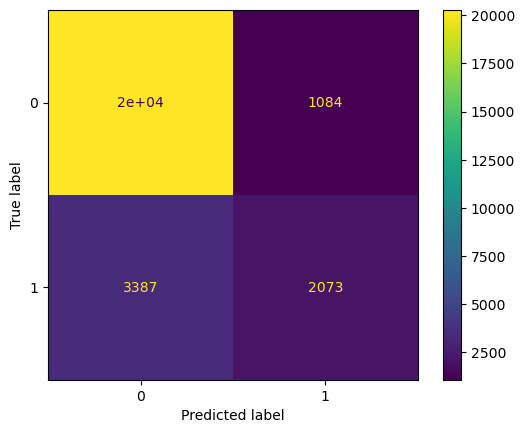

In [10]:
#Pipeline for our title feature: Count Vectorize it
word_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english'))
])

#Pipeline for the party features: One Hot encode them
party_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop= 'first'))
])

#Column transformer that will transform our whole dataframe
preprocess = ColumnTransformer([
    ('cvec', word_pipe, word_feature),
    ('party', party_pipe, party_features)
])

#Estimator pipeline with our preprocessing in there
rf_pipe = Pipeline([
    ('pre', preprocess),
    ('rf', RandomForestClassifier(random_state = 42))
])

rf_pipe.fit(X_train, y_train)

history.append(my_metrics(rf_pipe));